In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from statsmodels.tsa.stattools import adfuller

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train['Date'] = [time.ctime(int(i)) for i in train['timestamp'].tolist()]
train.index = train['Date']

In [4]:
eth = train[train['Asset_ID'] == 6]
eth = eth[eth['Date'].str.contains('2021')]

<AxesSubplot:xlabel='Date'>

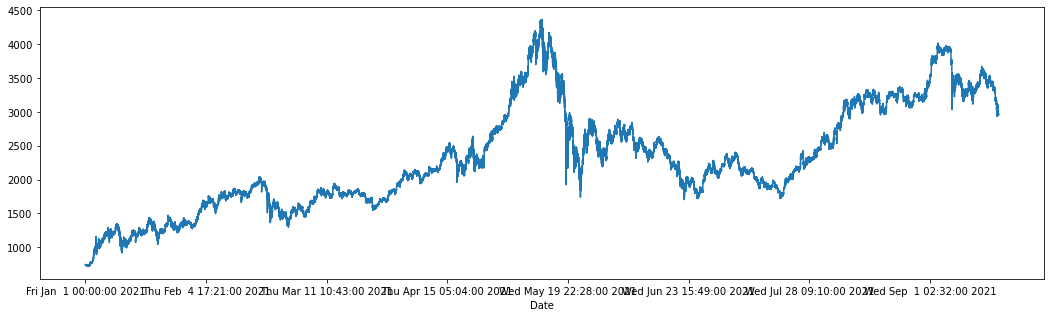

In [5]:
plt.figure(figsize=(18,5))
eth['Close'].plot()

In [6]:
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

In [7]:
check_adfuller(eth.Close.values)

Test statistic:  -2.114750704122413
p-value:  0.2386247847610382
Critical Values: {'1%': -3.4303672855396754, '5%': -2.861547639999662, '10%': -2.566774066493684}


In [8]:
eth['diff_1'] = eth.Close.diff() 
eth = eth.tail(eth.shape[0]-1)

<AxesSubplot:xlabel='Date'>

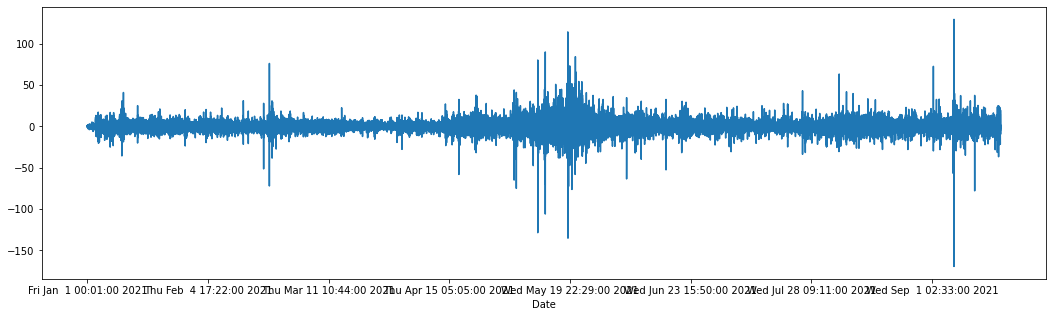

In [9]:
plt.figure(figsize=(18,5))
eth['diff_1'].plot()

In [10]:
check_adfuller(eth.diff_1.values)

Test statistic:  -62.80089270772057
p-value:  0.0
Critical Values: {'1%': -3.430367285585367, '5%': -2.861547640019857, '10%': -2.566774066504433}


In [11]:
eth.to_csv('eth_2021_stationary.csv')

In [12]:
eth

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Date,diff_1
Date,,,,,,,,,,,,
Fri Jan 1 00:01:00 2021,1609477260,6,377.0,743.435714,744.51,742.33,743.294286,494.370803,743.472659,0.001093,Fri Jan 1 00:01:00 2021,-0.064286
Fri Jan 1 00:02:00 2021,1609477320,6,488.0,743.169018,743.82,741.35,742.538571,479.628859,742.782502,0.001202,Fri Jan 1 00:02:00 2021,-0.755714
Fri Jan 1 00:03:00 2021,1609477380,6,620.0,742.351429,743.38,740.33,741.436880,922.621487,741.825876,0.000576,Fri Jan 1 00:03:00 2021,-1.101691
Fri Jan 1 00:04:00 2021,1609477440,6,555.0,741.412857,743.02,740.47,742.195714,574.012170,741.900205,0.000829,Fri Jan 1 00:04:00 2021,0.758834
Fri Jan 1 00:05:00 2021,1609477500,6,424.0,741.975714,743.10,741.13,742.177143,551.716237,742.115938,0.001154,Fri Jan 1 00:05:00 2021,-0.018571
...,...,...,...,...,...,...,...,...,...,...,...,...
Mon Sep 20 19:56:00 2021,1632182160,6,2162.0,2973.728686,2976.10,2962.09,2964.711429,751.256906,2968.339295,NaN,Mon Sep 20 19:56:00 2021,-9.315714
Mon Sep 20 19:57:00 2021,1632182220,6,1976.0,2965.461446,2967.95,2958.05,2960.845714,729.113672,2963.499199,NaN,Mon Sep 20 19:57:00 2021,-3.865714
Mon Sep 20 19:58:00 2021,1632182280,6,2262.0,2960.321429,2962.60,2954.14,2957.398571,807.935362,2958.464868,NaN,Mon Sep 20 19:58:00 2021,-3.447143
